# SWMAL Exercise

## Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for SWMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
# (command 'dir' for windows, 'ls' for Linux or Macs)
#
! dir
! ls

print("\nOK")

 Volume in drive C is Windows-SSD
 Volume Serial Number is F22A-8D76

 Directory of C:\Users\Bjark\source\repos\MAL\gitmal\L01

09/09/2023  12.31    <DIR>          .
08/09/2023  10.56    <DIR>          ..
01/09/2023  10.31    <DIR>          .ipynb_checkpoints
08/09/2023  10.55    <DIR>          datasets
01/09/2023  10.27           864.068 datasets.zip
01/09/2023  10.27             8.324 demo.ipynb
01/09/2023  10.27    <DIR>          Figs
09/09/2023  12.31           209.981 intro.ipynb
01/09/2023  10.27         5.973.879 lesson01.pdf
01/09/2023  10.27            12.393 modules_and_classes.ipynb
               5 File(s)      7.068.645 bytes
               5 Dir(s)  138.981.187.584 bytes free

OK


'ls' is not recognized as an internal or external command,
operable program or batch file.


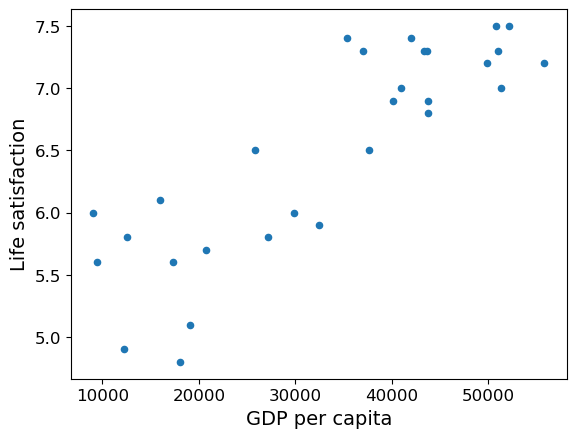

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)



# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]


print("OK")

## SWMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

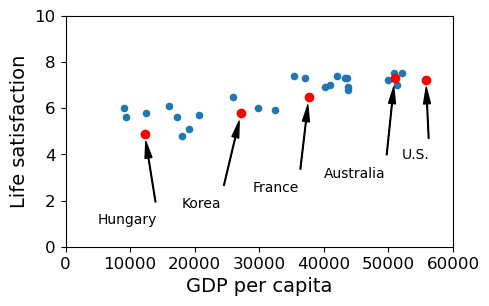

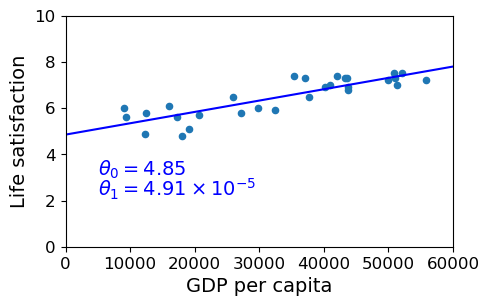

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/supervised_learning.png" alt="WARNING: could not get image from server." style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness? 

NOTE$_1$: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

NOTE$_2$: there are different definitions of the $R^2$, 'coefficient of determination', in linear algebra. We stricly use the formulation above. 

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

In [6]:
theta0 = model.intercept_  # Intercept
theta1 = model.coef_[0]   

print(f"{theta0}")
print(f"{theta1}")

[4.8530528]
[4.91154459e-05]


# Qa answers:
### How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?
If we want to get the intercept and coefficient params, also called $\theta_0$ and $\theta_1$. For a given model, it is possible to extract $\theta_0$ and $\theta_1$ with following python attributes.

In [7]:
r_sq = model.score(X,y)

print(f"{r_sq}")

0.7344414355437031


The R2 score is the coefficient of determination. It determines the fitness of the data to the linear model. It has a max value of 1, which indicates that the data match perfectly to the linear model. 
If you have a coefficient of determination below 0, it indicates that the model that is in use in incorrect.
Therefore the values for $R^2~$ range from negative to 1

It is best to have a high score, as to the fact that the max value 1 tells us that the data fit perfectly to the linear model. 

## The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

The K-nearest model use the amount of nieghbors it has while the linear regression model don't use anything when instatiated. The default value for K-nearest model is 5 if you don't change it. The method for calling fit and predict both for K-nearest model and linear regression model are the same. 

The score of the model can be compared in the sense that they provide information on how well the model performs. It will not be meaning full, but if one of the models are almost zero or less compare to another model that are almost 1. We can say that the model closed to 1 is a better model in this thought experiment. If you want to compare them you will also have to look un other different evaluation types as F1-Score. 

In [8]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In the cell below we start with preparing the data and visualizing it. 
We use the K-nearest neighbor regressor from sklearn which can be found: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

X.shape= (29, 1)
y.shape= (29, 1)


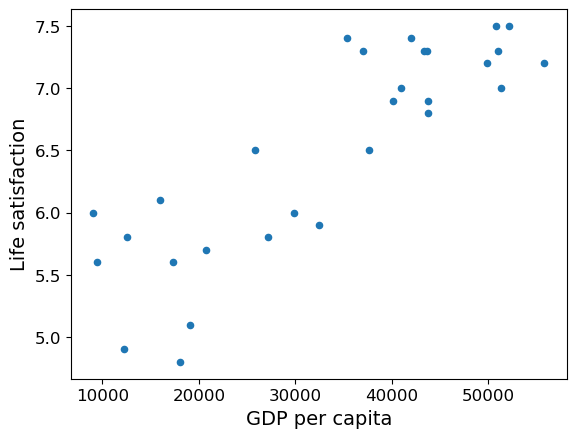

K-nearstneighbor prediction for Cypress: [[5.76666667]]
Linearregression prediction for Cypress: [[5.96242338]]


In [9]:
# Prepare the data

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)


# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

plt.show()

# Import the KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate 
knn = KNeighborsRegressor(n_neighbors=3)

# Train model
knn.fit(X, y)

# Predict and print the knn = 5.766667
print(f"K-nearstneighbor prediction for Cypress: {knn.predict(X_new)}")# knn = ..
print(f"Linearregression prediction for Cypress: {lin1.predict(X_new)}")

As you can see the prediction for the k-nearest neighbor and linear regression are not the same. However, they are close. What does that mean????

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

In this chapter will look into the tuning of parameter for k-nearest neighbors. By changing the parameter we will look into how it works and do a santity check. We will answer why the score closed to 1 does not mean, that the k-nearest nieghbors is the right esimater for the job. 

The problem with having a k-nearest neighbor produces a score that is 1. It make a prediction based in the single clostest value and that can cause overfitting. Or as you can see on the picture where N=1 the line does follow the rest of the data and is overfitting.

It is also a problem if the k-nearest neighbor gets too high, because the data does not follow the data as you can observe below where K=20.


But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  


Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://itundervisning.ase.au.dk/SWMAL/L01/Figs/regression_with_knn.png"  alt="WARNING: could not get image from server." style="height:150px">

1 nearesst neighbour score: 1.0
3 nearesst neighbour score: 0.8525732853499179
10 nearesst neighbour score: 0.7833080605150065


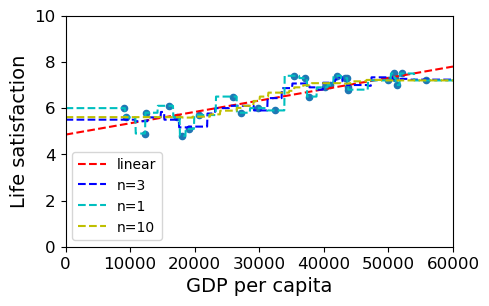

In [10]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
# Plot linear regression
plt.plot(m, y_pred_lin, "r--", label="linear")

# Plot Neighbor set to 3
plt.plot(m, y_pred_knn, "b--", label="n=3")

# Import the KNeighbor regressor
from sklearn.neighbors import KNeighborsRegressor

# Neighbor set to 1
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X, y)
y_pred_knn1 = knn1.predict(M)
plt.plot(m, y_pred_knn1, "c--", label="n=1")

# Neighbor set to 10
knn2 = KNeighborsRegressor(n_neighbors=10)
knn2.fit(X, y)
y_pred_knn2 = knn2.predict(M)
plt.plot(m, y_pred_knn2, "y--", label="n=10")

# Legends
plt.legend()

# Print 
print(f"1 nearesst neighbour score: {knn1.score(X, y)}")
print(f"3 nearesst neighbour score: {knn.score(X, y)}")
print(f"10 nearesst neighbour score: {knn2.score(X, y)}")

Above you can both see the score and the plotting of the 3 differen amount of neighbors. The K-nearest neighbor with 1 neighbor has a score 1, and follows the data complete, which is overfitting. The n=3 is better it follows the flow, but not as much and are less change of overfitting. It is hard to precise say which model are the best one from the picture. Linear regression wil differently go off track if we have to pridict someone that have 80000 GDP per capita.   

### Qd) Trying out a Neural Network

We are going to try to use the neural network. We are using the Multi-Layer Perceptron (MLP) for regression. We find the MLPregressor here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

OBS. Each run of the column below produce a different outcome, because we make a new MPLRegressor and traning again.  

In [35]:
from sklearn.neural_network import MLPRegressor;

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True);

# The semicolon should supress the output
mlp.fit(X, y.ravel());

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M);

Iteration 1, loss = 175575283.91874799
Iteration 2, loss = 172773539.59614018
Iteration 3, loss = 169996312.53272775
Iteration 4, loss = 167243980.67272326
Iteration 5, loss = 164516908.34228021
Iteration 6, loss = 161815445.26363173
Iteration 7, loss = 159139925.63668022
Iteration 8, loss = 156490667.29465988
Iteration 9, loss = 153867970.93958396
Iteration 10, loss = 151272119.46221048
Iteration 11, loss = 148703377.35022643
Iteration 12, loss = 146161990.18729842
Iteration 13, loss = 143648184.24457172
Iteration 14, loss = 141162166.16515145
Iteration 15, loss = 138704122.74108529
Iteration 16, loss = 136274220.78140292
Iteration 17, loss = 133872607.06886901
Iteration 18, loss = 131499408.40229037
Iteration 19, loss = 129154731.72048852
Iteration 20, loss = 126838664.30341607
Iteration 21, loss = 124551274.04536933
Iteration 22, loss = 122292609.79481971
Iteration 23, loss = 120062701.75506760
Iteration 24, loss = 117861561.93969810
Iteration 25, loss = 115689184.67669462
Iteration

Just inorge all the iteration, it is suppose to ignore them in the code with the semicolon ;

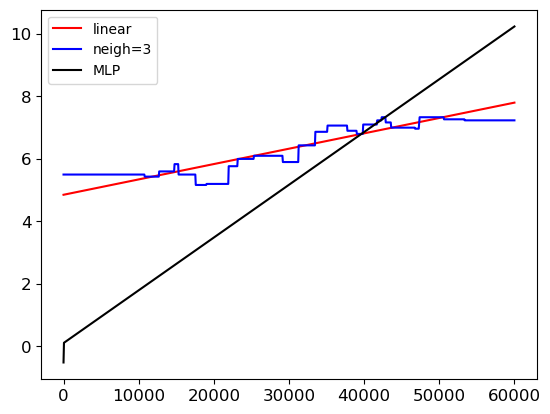

In [39]:
plt.plot(m, y_pred_lin, "r", label="linear")
plt.plot(m, y_pred_knn, "b", label="neigh=3")
plt.plot(m, y_pred_mlp, "k", label="MLP")
plt.legend()

In [37]:
print(f"MLP score:  {mlp.score(X, y)}")
print(f"K-nearstneighbor=3 score: {knn.score(X, y)}")
print(f"Linearregression score: {lin1.score(X, y)}")

MLP score:  -4.448010714023822
K-nearstneighbor=3 score: 0.8525732853499179
Linearregression score: 0.7344414355437031


The score for the MLP differentiate each time you train the model, sometime it -25.42, -3.85 or other values. As we can observe both from the score and the plot is the Multi-Layer Perceptron from the Neural Network does not fit the data well for iteration up till 10000. The score can again be use as a indicator if the model fits. 
As we can see the data-set for the training does not scaled well with the MLP without prescaling. The next chapter we will use the prescaling. 

###  [OPTIONAL] Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

**We still missing if we are doing it the right way or if we have to transform with the scaler. Maybe there is a setting?.**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [46]:
from sklearn.neural_network import MLPRegressor;
from sklearn import preprocessing
from sklearn import pipeline

# Setup MLPRegressor
mlp1 = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True);
scaler = preprocessing.StandardScaler()

pipeline_mlp = pipeline.Pipeline([
    ('scal', scaler),
    ('mpl', mlp1)])

# The semicolon should supress the output
pipeline_mlp.fit(X, y.ravel());

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp1 = pipeline_mlp.predict(M);

Iteration 1, loss = 21.00527322
Iteration 2, loss = 20.97213085
Iteration 3, loss = 20.93905199
Iteration 4, loss = 20.90603765
Iteration 5, loss = 20.87308880
Iteration 6, loss = 20.84020635
Iteration 7, loss = 20.80739114
Iteration 8, loss = 20.77464399
Iteration 9, loss = 20.74196565
Iteration 10, loss = 20.70935683
Iteration 11, loss = 20.67681818
Iteration 12, loss = 20.64435030
Iteration 13, loss = 20.61195373
Iteration 14, loss = 20.57962896
Iteration 15, loss = 20.54737645
Iteration 16, loss = 20.51519658
Iteration 17, loss = 20.48308968
Iteration 18, loss = 20.45105605
Iteration 19, loss = 20.41909592
Iteration 20, loss = 20.38720948
Iteration 21, loss = 20.35539686
Iteration 22, loss = 20.32365816
Iteration 23, loss = 20.29199342
Iteration 24, loss = 20.26040265
Iteration 25, loss = 20.22888579
Iteration 26, loss = 20.19744276
Iteration 27, loss = 20.16607343
Iteration 28, loss = 20.13477765
Iteration 29, loss = 20.10355519
Iteration 30, loss = 20.07240584
Iteration 31, loss 

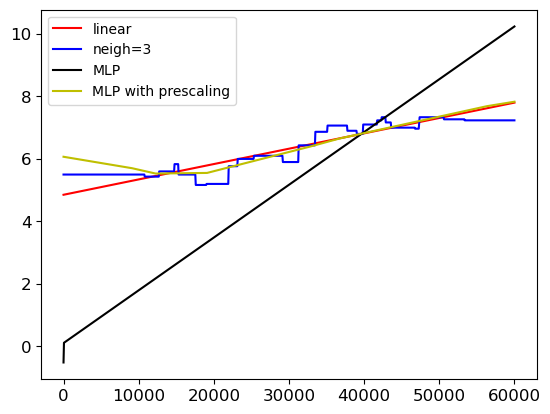

In [43]:
plt.plot(m, y_pred_lin, "r", label="linear")
plt.plot(m, y_pred_knn, "b", label="neigh=3")
plt.plot(m, y_pred_mlp, "k", label="MLP")
plt.plot(m, y_pred_mlp1, "y", label="MLP with prescaling")
plt.legend()

In [45]:
print(f"MLP-pre-scaling score:  {mlp1.score(X, y)}")
print(f"MLP score:  {mlp.score(X, y)}")
print(f"K-nearstneighbor=3 score: {knn.score(X, y)}")
print(f"Linearregression score: {lin1.score(X, y)}")

MLP-pre-scaling score:  -4200594131.122547
MLP score:  -4.448010714023822
K-nearstneighbor=3 score: 0.8525732853499179
Linearregression score: 0.7344414355437031


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

REVISIONS||
:- | :-
2018-12-18| CEF, initial.                  
2019-01-24| CEF, spell checked and update. 
2019-01-30| CEF, removed reset -f, did not work on all PC's. 
2019-08-20| CEF, E19 ITMAL update. 
2019-08-26| CEF, minor mod to NN exercise.
2019-08-28| CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-01-25| CEF, F20 ITMAL update.
2020-08-06| CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-09-24| CEF, updated text to R2, Qa exe.
2020-09-28| CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-01-12| CEF, updated Qe.
2021-02-08| CEF, added ls for Mac/Linux to dir command cell. 
2021-08-02| CEF, update to E21 ITMAL.
2021-08-03| CEF, fixed ref to p21 => p.22.
2022-01-25| CEF, update to F22 SWMAL.
2022-08-30| CEF, update to v1 changes.
2023-08-30| CEF, minor table update for.